In [2]:
%%HTML
<style>.container{width:100%}</style>

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

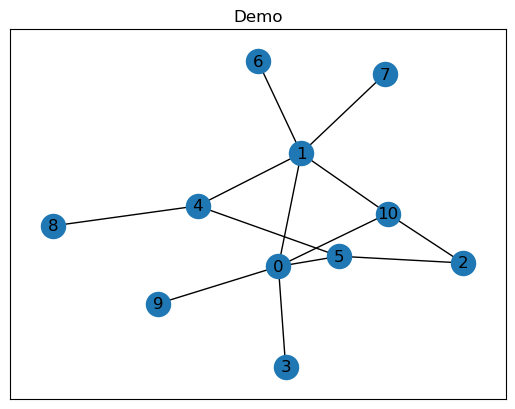

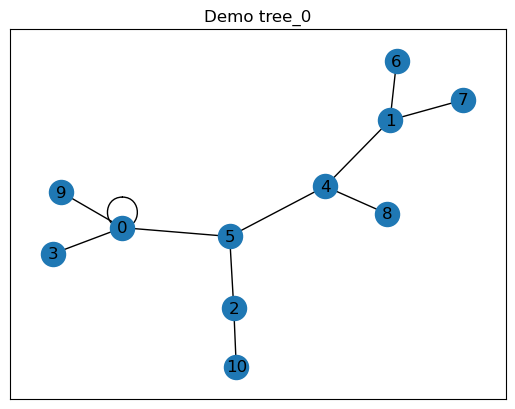

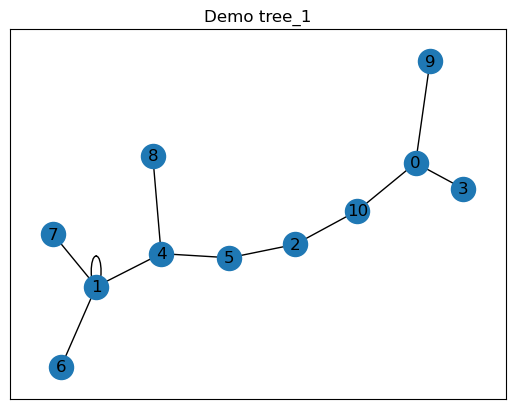

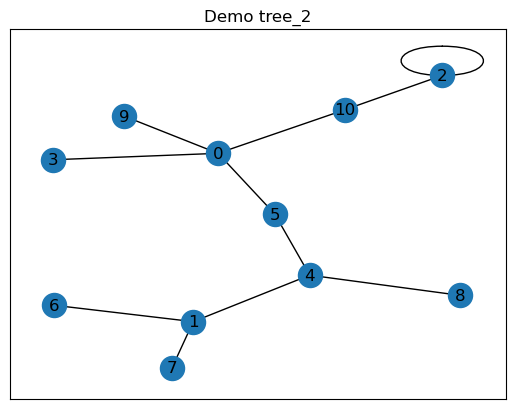

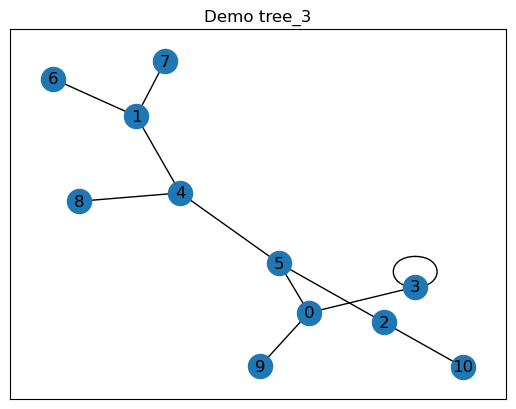

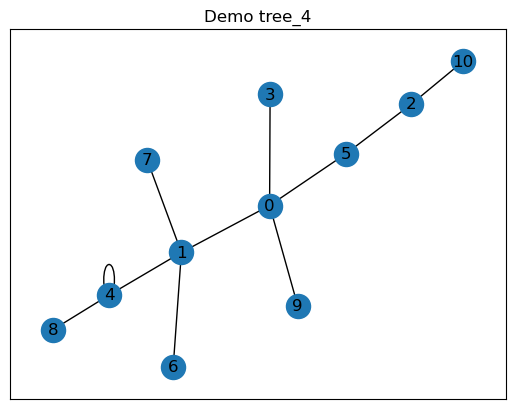

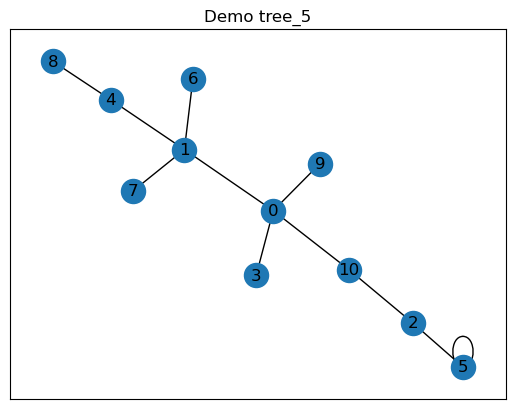

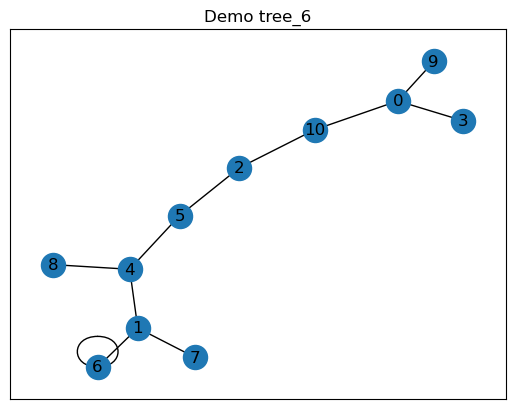

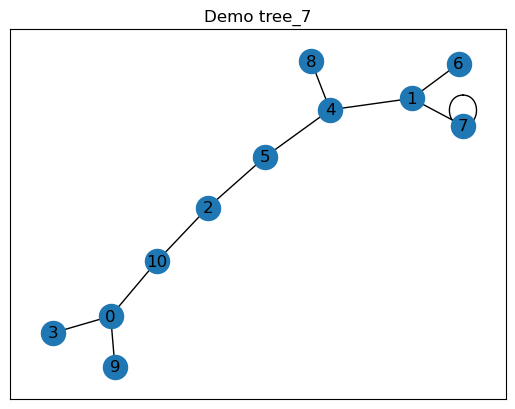

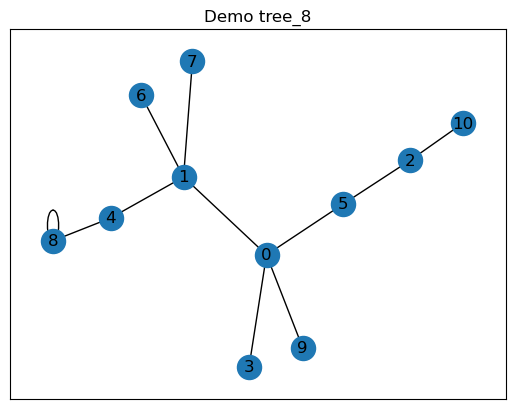

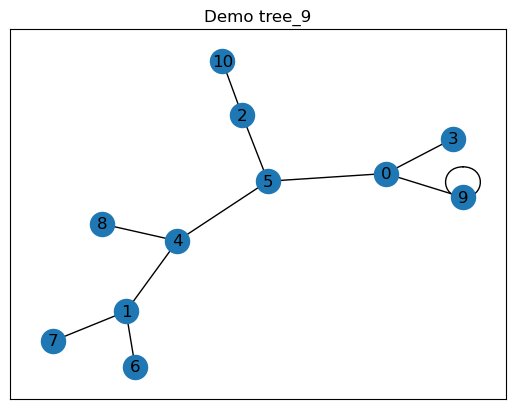

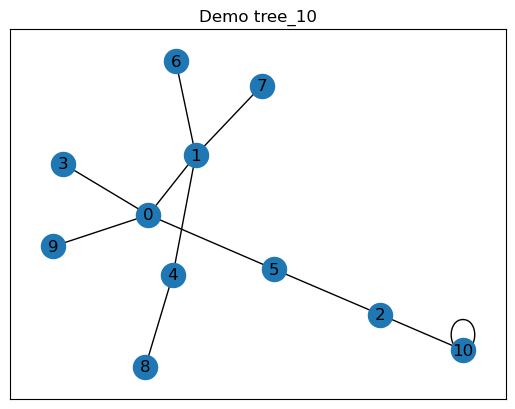

In [52]:
class Graph:
    def __init__(self, adj_list: dict = {}, name="Graph", directed=False):
        self.plt = plt

        self.nx = nx
        # validation

        tmp = []
        for i in adj_list:
            tmp.extend(adj_list[i])

        if not directed and set(tmp) == set(adj_list.keys()):
            self.adj_list = adj_list
            self.directed = directed
            self.name = name
        else:
            print("Error :  It is not a valid graph")

    def __str__(self):
        string = "  " + self.name + "\n"
        for i in self.adj_list.keys():
            string += (
                str(i) + " : [" + ",".join([str(j) for j in self.adj_list[i]]) + "]\n"
            )
        return string

    def add_node(self, node):
        if node not in self.adj_list.keys():
            self.adj_list[node] = []
        else:
            print(f"Warning :  the node'{node}' already exists")

    def add_edge(self, node1, node2):
        graph = self.adj_list
        if node1 in graph and node2 in graph:
            graph[node1].append(node2)
            if not self.directed:
                graph[node2].append(node1)

    def get_nodeSet(self):
        return list(self.adj_list.keys())

    def get_edgSet(self):
        edgSet = []
        for i in self.adj_list.keys():
            for j in self.adj_list[i]:
                edgSet.append(tuple([i, j]))
        return edgSet

    def dfs(self, node):
        if node in self.adj_list.keys():
            traverse = []
            visited = set()
            stack = [node]
            while stack:
                current = stack.pop()
                if current not in visited:
                    visited.add(current)
                    traverse.append(current)
                    stack.extend(self.adj_list[current])

            return traverse
        else:
            print(f"Error :  node'{node}' does not exist in graph")

    def bfs(self, node):
        if node in self.adj_list.keys():
            traverse = []
            visited = set()
            queue = [node]
            while queue:
                current = queue.pop(0)
                if current not in visited:
                    visited.add(current)
                    traverse.append(current)
                    queue.extend(self.adj_list[current])
            return traverse

        else:
            print(f"Error :  node'{node}' does not exist in graph")

    def getPath(self, n1, n2, path=[]):
        g = self.adj_list
        path += [n1]
        if n2 not in g[n1]:
            for i in g[n1]:
                if i not in path:
                    path1 = self.getPath(i, n2, path.copy())
                    if path1:
                        return path1
        else:
            return path + [n2]

    def opt_path(self, path):
        g = self.adj_list
        l = len(path)
        path1 = path.copy()
        t = 2
        for i in range(l):
            for j in range(i + 2, l):
                if abs(j - i) > t:
                    n1 = path[i]
                    n2 = path[j]
                    if n2 in g[n1]:
                        path1 = path[: i + 1] + path[j:]
                        t = abs(j - i)
        return path1

    def sortestPath(self, n1, n2):
        path = self.getPath(n1, n2)
        spath = self.opt_path(path)
        return spath

    def display(self):
        G = self.nx.Graph()
        G.add_nodes_from(self.get_nodeSet())
        G.add_edges_from(self.get_edgSet())
        self.nx.draw_networkx(G)
        self.plt.title(self.name)
        self.plt.show()

    def makeTree(self, Root=None):
        temp_ls = dict()
        if (Root == None) or (Root not in self.adj_list.keys()):
            root = list(self.adj_list.keys())[0]
        else:
            root = Root
        temp_ls[root] = [root]
        stack = [root]

        def visite(root):
            for i in self.adj_list[root]:
                if root not in temp_ls:
                    temp_ls[root] = list()
                if i not in stack:
                    stack.append(i)
                    temp_ls[root].append(i)
                    visite(i)

        visite(root)

        return temp_ls


adj_list = {
    0: [3, 5, 9, 10, 1],
    1: [6, 7, 4, 0, 10],
    2: [10, 5],
    3: [0],
    4: [1, 5, 8],
    5: [2, 0, 4],
    6: [1],
    7: [1],
    8: [4],
    9: [0],
    10: [2, 0],
}
g = Graph(adj_list, name="Demo")
g.display()
for i in adj_list:
    g1 = Graph(g.makeTree(Root=i), name="Demo tree_" + str(i))
    g1.display()

In [ ]:
print(g)
g.add_edge(8, 10)
print(g)
print(g.sortestPath(8, 10))
g.display()

In [7]:
class Tree:
    def __init__(self, data, parent=None):
        self.data = data
        self.childs = []

    def addChild(self, *nodes):
        childs = [Tree(i, parent=self) for i in nodes]
        self.childs.extend(childs)
        if len(childs) == 1:
            return childs[0]
        return childs

    def getChilds(self):
        return [i.data for i in self.childs]

    def getElements(self):
        elements = [self.data]
        for i in self.childs:
            elements.extend(i.getElements())
        return elements

    def traverse(self, order="pre"):
        ls = []
        if order == "pre":
            ls.append(self.data)
            for i in self.childs:
                ls.extend(i.traverse(order=order))
            return ls
        elif order == "post":
            for i in self.childs:
                ls.extend(i.traverse(order=order))
            ls.append(self.data)
            return ls


tree = Tree(1)
t2 = tree.addChild(2)
t2t3 = t2.addChild(2, 3, 4, 5, 1, 7, 9)
tree.addChild(90, 23, 41)
tree.getElements()
# tree.traverse()

[1, 2, 2, 3, 4, 5, 1, 7, 9, 90, 23, 41]

In [8]:
tree.traverse("post")

[2, 3, 4, 5, 1, 7, 9, 2, 90, 23, 41, 1]

In [9]:
class BTree:
    def __init__(self, data, parent=None):
        self.data = data
        self.left = None
        self.right = None
        self.parent = parent

    def getElement(self, idx):
        path = []
        while idx > 0:
            if idx % 2 == 1:
                path.append((idx % 2))
                idx //= 2
            else:
                path.append((idx % 2) + 2)
                idx = idx // 2 - 1
        temp = self
        while path and temp:
            dr = path.pop()
            if dr == 1:
                temp = temp.left
            else:
                temp = temp.right
        if temp:
            return temp
        else:
            print("id does not exists")

    def getDepth(self):
        ld = self.left.getDepth() if self.left else -1
        rd = self.right.getDepth() if self.right else -1
        return max(ld, rd) + 1

    def isBalanced(self):
        ld = self.left.getDepth() if self.left else -1
        rd = self.right.getDepth() if self.right else -1
        if abs(ld - rd) in [0, 1]:
            lb = self.left.isBalanced() if self.left else True
            rb = self.right.isBalanced() if self.right else True
            return bool(lb * rb)

    def getParent(self):
        return self.parent

    def getChilds(self):
        return [self.left, self.right]

    def getId(self):
        if self.parent != None:
            if self == self.parent.left:
                return self.parent.getId() * 2 + 1
            else:
                return self.parent.getId() * 2 + 2
        else:
            return 0

    def __setattr__(self, key, value):
        self.__dict__[key] = value
        if value:
            if key in ["left", "right"]:
                value.parent = self

    def getSize(self):
        lsize = self.left.getSize() if self.left else 0
        rsize = self.right.getSize() if self.right else 0
        return lsize + 1 + rsize

    def addData(self, data, idx=-1):
        if idx == -1:
            q = []
            q.append(self)
            while len(q):
                temp = q[0]
                q.pop(0)
                if not temp.left:
                    temp.left = BTree(data, parent=temp)
                    break
                else:
                    q.append(temp.left)
                if not temp.right:
                    temp.right = BTree(data, parent=temp)
                    break
                else:
                    q.append(temp.right)
        else:
            dr = idx % 2
            if dr == 1:
                ele = self.getElement(idx // 2)
                ele.left = BTree(data, parent=ele)
            else:
                ele = self.getElement(idx // 2 - 1)
                ele.right = BTree(data, parent=ele)

    def addNode(self, node, idx=-1):
        if idx == -1:
            q = []
            q.append(self)
            while len(q):
                temp = q[0]
                q.pop(0)
                if not temp.left:
                    temp.left = node
                    break
                else:
                    q.append(temp.left)
                if not temp.right:
                    temp.right = node
                    break
                else:
                    q.append(temp.right)

    def traverse(self, order="pre"):
        ls = []
        if order == "pre":
            ls.append(self.data)
            if self.left:
                ls.extend(self.left.traverse(order))
            if self.right:
                ls.extend(self.right.traverse(order))
            return ls
        elif order == "post":
            if self.left:
                ls.extend(self.left.traverse(order))
            if self.right:
                ls.extend(self.right.traverse(order))
            ls.append(self.data)
            return ls
        elif order == "in":
            if self.left:
                ls.extend(self.left.traverse(order))
            ls.append(self.data)
            if self.right:
                ls.extend(self.right.traverse(order))
            return ls

In [10]:
bt = BTree(0)
bt.left = BTree(1)
bt.right = BTree(2)
bt.left.left = BTree(3)
bt.left.right = BTree(4)
bt.right.left = BTree(5)


# bt.getElement(5)
bt.traverse("post")

[3, 4, 1, 5, 2, 0]

In [11]:
btr = BTree(3)
ls = [5, 6, 8, 11, 4, 14, 9, 17]
for i in ls:
    btr.addData(i)
btr.traverse(order="in")
# btr.getElement(5).getId()

[9, 8, 17, 5, 11, 3, 4, 6, 14]

In [12]:
btr.addData(50, idx=1)
btr.traverse()

[3, 50, 6, 4, 14]

In [13]:
btr.data

3

In [14]:
btr.getElement(1).getId()


bt.getSize(), btr.getSize()

(6, 5)

In [15]:
btr.traverse()

[3, 50, 6, 4, 14]